<h2>Project 1: $k$-Nearest Neighbors</h2>
<p><cite><center>So many points,<br>
some near some far,<br>
- who are my true neighbors?</center></cite></p>


<h3>Introduction</h3>

<p>In this project, you will build a $k$-nearest neighbor classifier. You will need to edit several functions. </p>

<strong>How to submit:</strong> You can submit your code using the red <strong>Submit</strong> button above. This button will send any code below surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags below to the autograder, which will then run several tests over your code. By clicking on the <strong>Details</strong> dropdown next to the Submit button, you will be able to view your submission report once the autograder has completed running. This submission report contains a summary of the tests you have failed or passed, as well as a log of any errors generated by your code when we ran it.

Note that this may take a while depending on how long your code takes to run! Once your code is submitted you may navigate away from the page as you desire -- the most recent submission report will always be available from the Details menu.

<p><strong>Evaluation:</strong> Your code will be autograded for technical
correctness and--on some assignments--speed. Please <em>do not</em> change the names of any provided functions or classes within the code, or you will wreak havoc on the autograder. Furthermore, <em>any code not surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags will not be run by the autograder</em>. However, the correctness of your implementation -- not the autograder's output -- will be the final judge of your score.  If necessary, we will review and grade assignments individually to ensure that you receive due credit for your work.

<p><strong>Academic Integrity:</strong> We will be checking your code against other submissions in the class for logical redundancy. If you copy someone else's code and submit it with minor changes, we will know. These cheat detectors are quite hard to fool, so please don't try. We trust you all to submit your own work only; <em>please</em> don't let us down. If you do, we will pursue the strongest consequences available to us.

<p><strong>Getting Help:</strong> You are not alone!  If you find yourself stuck  on something, contact the course staff for help.  Office hours, section, and the <a href="https://piazza.com/class/icxgflcnpra3ko">Piazza</a> are there for your support; please use them.  If you can't make our office hours, let us know and we will schedule more.  We want these projects to be rewarding and instructional, not frustrating and demoralizing.  But, we don't know when or how to help unless you ask.  


**Libraries**: Before we get started we need to install a few libraries. You can do this by executing the following code. The first time you execute this code it may take a little while as it will install and compile the libraries on your computing node. 

In [1]:
# You should have run this code before, but just in case
Pkg.add("MAT") # this may take a little while the first time you run it
Pkg.build("MAT")
Pkg.add("PyPlot")
Pkg.build("PyPlot")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of MAT
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Building Blosc
INFO: Building HDF5
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Building Conda
INFO: Building PyCall
INFO: PyCall is using /usr/bin/python (Python 3.4.3) at /usr/bin/python, libpython = /usr/lib64/libpython3.4m
INFO: /home/ccc_v1_t18394__37063/work/asn10120_K_Nearest_Neighbors/asn10121_Nearest_Neighbors/work/.julia/v0.5/PyCall/deps/deps.jl has not changed
INFO: /home/ccc_v1_t18394__37063/work/asn10120_K_Nearest_Neighbors/asn10121_Nearest_Neighbors/work/.julia/v0.5/PyCall/deps/PYTHON has not changed


<h3> k-Nearest Neighbors implementation in Julia </h3>

<p>Our first goal towards a $k$NN classifier is to build a classifier for handwritten digits classification and face recognition. 
</p>

**Data:** We first obtain some data for testing your code. The data resides in the files <code>faces.mat</code> and <code>digits.mat</code> which hold the datasets for the further experiments. First, let us define a function that loads the data set.

In [4]:
using MAT
function loaddata(filename)
    data=matread(filename)
    xTr=data["xTr"]; # load in Training data
    yTr=round(Int,data["yTr"]); # load in Training labels
    xTe=data["xTe"]; # load in Testing data
    yTe=round(Int,data["yTe"]); # load in Testing labels
    return xTr',yTr,xTe',yTe
end;

Here, <b>xTr</b> are the training vectors with labels <b>yTr</b> and <b>xTe</b> are the testing vectors with labels <b>yTe</b>. 
As a reminder, to predict the label or class of an image in <b>xTe</b>, we will look for the <i>k</i>-nearest neighbors in <b>xTr</b> and predict a label based on their labels in <b>yTr</b>. For evaluation, we will compare these labels against the true labels provided in <b>yTe</b>.</p>

<h4> Visualizing data</h4>

Let us take a look at our data. The following script will take the first 10 training images from the face data set and visualize them.

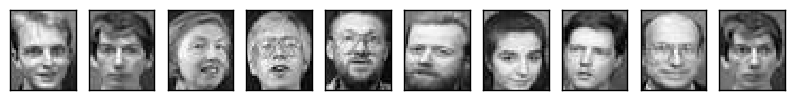

(280,1178)

In [5]:
using PyPlot # tell Julia we need to know the plotting functions
xTr,yTr,xTe,yTe=loaddata("faces.mat"); # load the data

function plotfaces(X,xdim=38,ydim=31)
    figure("Face",figsize=(size(X,1),10.0/size(X,1))); # create a new figure
    set_cmap("gray"); # set the color to grayscale
    for i=1:size(X,1)
        subplot(1,size(X,1),i);
        M=reshape(X[i,:],xdim,ydim); # take the ith import and reshape it into image size
     M=flipdim(M,1); # flip the image upside down ( this corrects a bug in some installations, ucomment if unnecessary)
     pcolormesh(M); # draw the image
     xticks([]);yticks([]); #Remove X and Y ticks
     axis("tight"); # make the image take the fall space
    end;    
end;
clf; # clear the screen
plotfaces(xTr[1:10,:]);


<h4> Implementation </h4>
<p> The following questions will ask you to finish these functions in a pre-defined order. <br></p>

<p>(a) Implement the functions <b><code>innerproduct</code></b> and <b><code>l2distance</code></b>. You may use your own code(s) from the previous project.</p>

<p>(b) Implement the function <b><code>findknn</code></b>, which should find the $k$ nearest neighbors of a set of vectors within a given training data set. The call of 
<pre>
 [I,D]=findknn(xTr,xTe,k);
</pre> 
should result in two matrices $I$ and $D$, both of dimensions $k\times n$, where $n$ is the number of input vectors in <code>xTe</code>. The matrix $I(i,j)$ is the index of the $i^{th}$ nearest neighbor of the vector $xTe(j,:)$. 
So, for example, if we set <code>i=I(1,3)</code>, then <code>xTr(i,:)</code> is the first nearest neighbor of vector <code>xTe(3,:)</code>. The second matrix $D$ returns the corresponding distances. So $D(i,j)$ is the distance of $xTe(j,:)$ to its $i^{th}$ nearest neighbor.
</p>
   

In [ ]:
#<GRADED>
function innerproduct(X,Z=[])
    # function innerproduct(X,Z)
    #
    # Computes the inner-product matrix.
    # Syntax:
    # D=innerproduct(X,Z)
    # Input:
    # X: nxd data matrix with n vectors (rows) of dimensionality d
    # Z: mxd data matrix with m vectors (rows) of dimensionality d
    #
    # Output:
    # Matrix G of size nxm
    # G(i,j) is the inner-product between vectors X(i,:) and Z(j,:)
    #
    # call with only one input:
    # innerproduct(X)=innerproduct(X,X)
    #

    if (isempty(Z)) # case when there is only one input (X)
    ## fill in code here

    else  # case when there are two inputs (X,Z)
    ## fill in code here 

    end;
    return(G)
end

function l2distance(X,Z=[])
    # function D=l2distance(X,Z)
    #
    # Computes the Euclidean distance matrix.
    # Syntax:
    # D=l2distance(X,Z)
    # Input:
    # X: nxd data matrix with n vectors (rows) of dimensionality d
    # Z: mxd data matrix with m vectors (rows) of dimensionality d
    #
    # Output:
    # Matrix D of size nxm
    # D(i,j) is the Euclidean distance of X(i,:) and Z(j,:)
    #
    # call with only one input:
    # l2distance(X)=l2distance(X,X)
    #

    if(isempty(Z));
        ## fill in code here

    else  # case when there are two inputs (X,Z)
        ## fill in code here

    end
    return(D);
end
#</GRADED>

In [4]:
#<GRADED>
function findknn(xTr,xTe,k);
# function [indices,dists]=findknn(xTr,xTe,k);
#
# Finds the k nearest neighbors of xTe in xTr.
#
# Input:
# xTr = nxd input matrix with n row-vectors of dimensionality d
# xTe = mxd input matrix with m row-vectors of dimensionality d
# k = number of nearest neighbors to be found
# 
# Output:
# indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
# dists = Euclidean distances to the respective nearest neighbors
#

    ## fill in code here
    
    return (indices,dists)    
end;
#</GRADED>

We can visualize the 10 nearest training neighbors of some of the test points.

In [6]:
who=4;
k=10;
indices,dists=findknn(xTr,xTe[who,:]',k);
plotfaces(xTr[indices,:]);


LoadError: LoadError: UndefVarError: findknn not defined
while loading In[6], in expression starting on line 3

<p>(c) The function <b><code>analyze</code></b> should compute various metrics to evaluate a classifier. The call of
<pre>
  result=analyze(kind,truth,preds);
</pre>
should output the <b>accuracy</b> or <b>absolute loss</b> in variable <code>result</code>. The type of output required can be specified in the input argument <code>kind</code> as <code>"abs"</code> or <code>"acc"</code>. The input variables <code>truth</code> and <code>pred</code> should contain vectors of true and predicted labels respectively.
For example, the call
<pre>
>> analyze('acc',[1 2 1 2],[1 2 1 1])
</pre>
should return an accuracy of 0.75. Here, the true labels are 1,2,1,2 and the predicted labels are 1,2,1,1. So the first three examples are classified correctly, and the last one is wrong --- 75% accuracy.
</p>


In [6]:
#<GRADED>
function analyze(kind,truth,preds)   
# function output=analyze(kind,truth,preds)         
# Analyses the accuracy of a prediction
# Input:
# kind='acc' classification error
# kind='abs' absolute loss
# (other values of 'kind' will follow later)
# 
    preds=preds[:];
    truth=truth[:];
    if kind=="abs"
         # compute the absolute difference between truth and predictions
         ## fill in the code here
        
    end;
    if kind =="acc"
         ## fill in code here  
        
    end;
    return(output);
end;
#</GRADED>


<p>(d) Implement the function <b><code>knnclassifier</code></b>, which should perform $k$ nearest neighbor classification on a given test data set. The call <pre>preds=knnclassifier(xTr,yTr,xTe,k)</pre>
should output the predictions for the data in <code>xTe</code> i.e. <code>preds[i]</code> will contain the prediction for <code>xTe[i,:]</code>.</p>


In [7]:
#<GRADED>
function knnclassifier(xTr,yTr,xTe,k);
# function preds=knnclassifier(xTr,yTr,xTe,k);
#
# k-nn classifier 
#
# Input:
# xTr = nxd input matrix with n row-vectors of dimensionality d
# xTe = mxd input matrix with m row-vectors of dimensionality d
# k = number of nearest neighbors to be found
#
# Output:
#
# preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
#

    ## fill in code here

    return(preds)
end;
#</GRADED>

<p>You can compute the actual classification error on the test set by calling
<pre>
>> analyze("acc",yTe,knnclassifier(xTr,yTr,xTe,3))
</pre></p>


<p>(e) This script runs the $k$-nearest neighbor classifier over the faces and digits data set. The faces data set has $40$ classes, the digits data set $10$. What classification accuracy would you expect from a random classifier?</p>


In [8]:
#function [result,totaltime]=hw1tictoc()
# function [result,totaltime]=hw1tictoc()
print("Face Recognition: (1-nn)\n")
xTr,yTr,xTe,yTe=loaddata("../resource/lib/faces.mat"); # load the data
tic();
preds=knnclassifier(xTr,yTr,xTe,1);
result=analyze("acc",yTe,preds);
totaltime=toc();
@printf("You obtained %2.2f%% classification acccuracy in %2.4f seconds\n",result*100.0,totaltime);

@printf("\n");
@printf("Handwritten digits Recognition: (5-nn)\n")
xTr,yTr,xTe,yTe=loaddata("../resource/lib/digits.mat"); # load the data
tic();
preds=knnclassifier(xTr,yTr,xTe,5);
result=analyze("acc",yTe,preds);
totaltime=toc();
@printf("You obtained %2.2f%% classification acccuracy in %2.1f seconds\n",result*100.0,totaltime);

Face Recognition: (1-nn)
elapsed time: 2.063696524 seconds
You obtained 95.83% classification acccuracy in 2.0637 seconds

Handwritten digits Recognition: (3-nn)
elapsed time: 1.732522978 seconds
You obtained 95.22% classification acccuracy in 1.7 seconds


<p>(f) (optional) Sometimes a $k$-NN classifier can result in a draw, when the majority vote is not clearly defined. Can you improve your accuracy by falling back onto $k$-NN with lower $k$ in such a case?</p>

<p>(g) Edit the function <b><code>competition</code></b>, which reads in a training and testing set and makes predictions. Inside this function you are free to use any combination or variation of the k-nearest neighbor classifier. Can you beat my submission on our secret training and testing set? </p>

<h4>Evaluation</h4>
<p>For this project, you will be ranked on the following measures:
<ul>
<li>Percentage of test cases passed</li>
<li>Average of:
<ul>
  <li>Accuracy on the faces test dataset and</li>
  <li>Accuracy on the digits test dataset</li>
  <li>Accuracy on the <i>secret</i> test dataset</li>
</ul>
</ul>

</p>

In [9]:
#<GRADED>
function competition(xTr,yTr,xTe);
#% function preds=competition(xTr,yTr,xTe);
#%
#% A classifier that outputs predictions for the data set xTe based on 
#% what it has learned from xTr,yTr
#%
#% Input:
#% xTr = nxd input matrix with n column-vectors of dimensionality d
#% xTe = mxd input matrix with n column-vectors of dimensionality d
#%
#% Output:
#%
#% preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
#%

    #%fill in the code here
    
    return (preds);
end;
#</GRADED>